In [2]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


'2.15.0'

In [3]:
#Important libraries for data manipulation
# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
# Pandas is used for data manipulation and analysis
import numpy as np
import pandas as pd
# Import necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg  # Add this line
from zipfile import ZipFile
from google.colab import drive
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from tensorflow.keras.utils import to_categorical
# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays
import matplotlib.pyplot as plt

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os
import random
import pickle

# Sklearn
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix

# Libraries for working with images and CNN
import cv2
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten,Conv2D, MaxPooling2D
from tensorflow.keras import optimizers

from tensorflow.keras.applications import ResNet50, VGG16, VGG19, MobileNetV2
from tensorflow.keras.applications.resnet50 import preprocess_input as prepro_res50
# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

from zipfile import ZipFile

In [4]:
# Define the path to your data zip file
data_path = "/content/drive/MyDrive/56-ML.zip"

# Extract the dataset from the zip file
with ZipFile(data_path, 'r') as zip:
    zip.extractall()
    print('The data set has been extracted.')

The data set has been extracted.


In [5]:
import os

# Define the extracted directory
extracted_dir = "/content/ML-Project"

# List the contents of the extracted directory
extracted_contents = os.listdir(extracted_dir)

# Print the list of contents
print("Contents of the extracted directory:")
for item in extracted_contents:
    print(item)


Contents of the extracted directory:
assign_classification


In [6]:
# Specify the directory path
base_dir = "/content/ML-Project/assign_classification"

# Get the list of file names in the directories
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

# Function to count the number of images in each class
def count_images_in_class(class_dir):
    return len(os.listdir(class_dir))

# Function to get image paths for visualization
def get_image_paths(class_dir, start_index, num_images):
    image_paths = [os.path.join(class_dir, img) for img in os.listdir(class_dir)[start_index:start_index + num_images]]
    return image_paths

# Display the number of images in each class
for class_name in os.listdir(train_dir):
    class_dir = os.path.join(train_dir, class_name)
    print(f"Number of images in '{class_name}' class: {count_images_in_class(class_dir)}")

Number of images in 'bike' class: 50
Number of images in 'others' class: 20
Number of images in 'car' class: 50


Number of images in 'bike' class: 50
Image paths to display: ['/content/ML-Project/assign_classification/train/bike/pfva_dataset_file_G_18082023_134847_44.jpg', '/content/ML-Project/assign_classification/train/bike/pfva_dataset_file_G_18082023_134947_4.jpg', '/content/ML-Project/assign_classification/train/bike/pfva_dataset_file_G_18082023_191113_11.jpg', '/content/ML-Project/assign_classification/train/bike/pfva_dataset_file_G_18082023_194044_6.jpg']


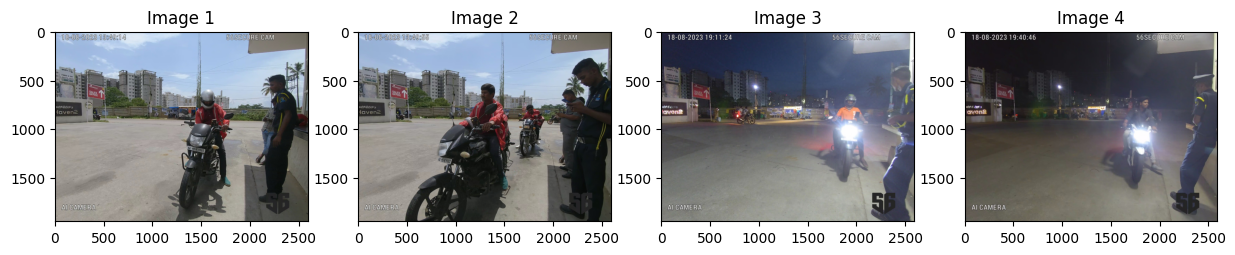

In [8]:
# Visualize some images from the 'bike' class
num_images_to_display = 4
class_name = 'bike'
class_dir = os.path.join(train_dir, class_name)
print(f"Number of images in '{class_name}' class: {count_images_in_class(class_dir)}")
image_paths_to_display = get_image_paths(class_dir, start_index=0, num_images=num_images_to_display)
print("Image paths to display:", image_paths_to_display)

# Display the images
fig, axes = plt.subplots(1, num_images_to_display, figsize=(15, 5))
for i, image_path in enumerate(image_paths_to_display):
    img = plt.imread(image_path)
    axes[i].imshow(img)
    axes[i].set_title(f"Image {i+1}")
plt.show()

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


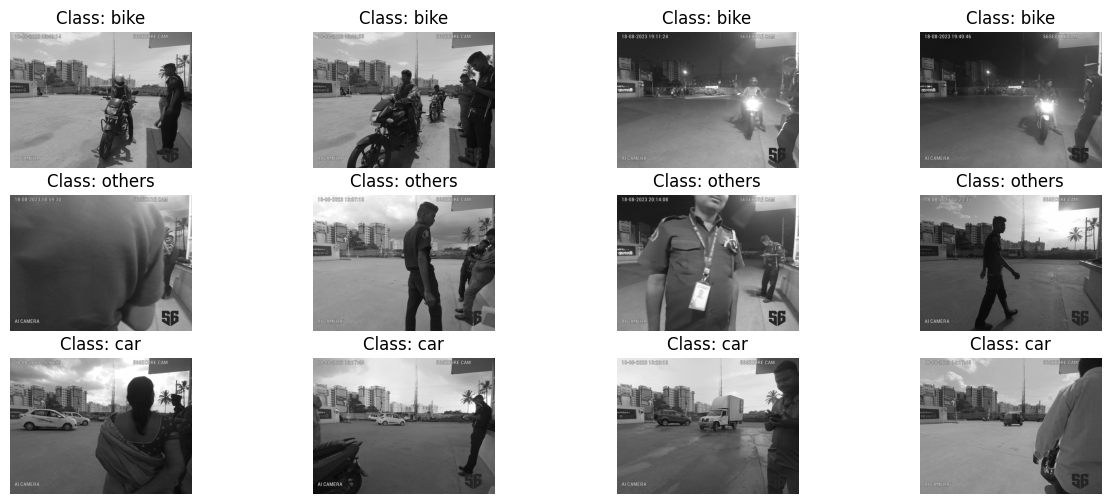

In [9]:
# Function to convert RGB images to grayscale
def rgb_to_gray(rgb):
    return np.dot(rgb[..., :3], [0.2989, 0.5870, 0.1140])

# Get the list of class names
class_names = os.listdir(train_dir)

# Display all images for each class in grayscale
fig, axes = plt.subplots(len(class_names), 4, figsize=(15, 2 * len(class_names)))
for i, class_name in enumerate(class_names):
    class_dir = os.path.join(train_dir, class_name)
    image_files = os.listdir(class_dir)[:4]  # Display the first 4 images for each class
    for j, image_file in enumerate(image_files):
        image_path = os.path.join(class_dir, image_file)
        img = plt.imread(image_path)
        gray_img = rgb_to_gray(img)
        axes[i, j].imshow(gray_img, cmap='gray')
        axes[i, j].axis('off')
        axes[i, j].set_title(f"Class: {class_name}")
plt.show()

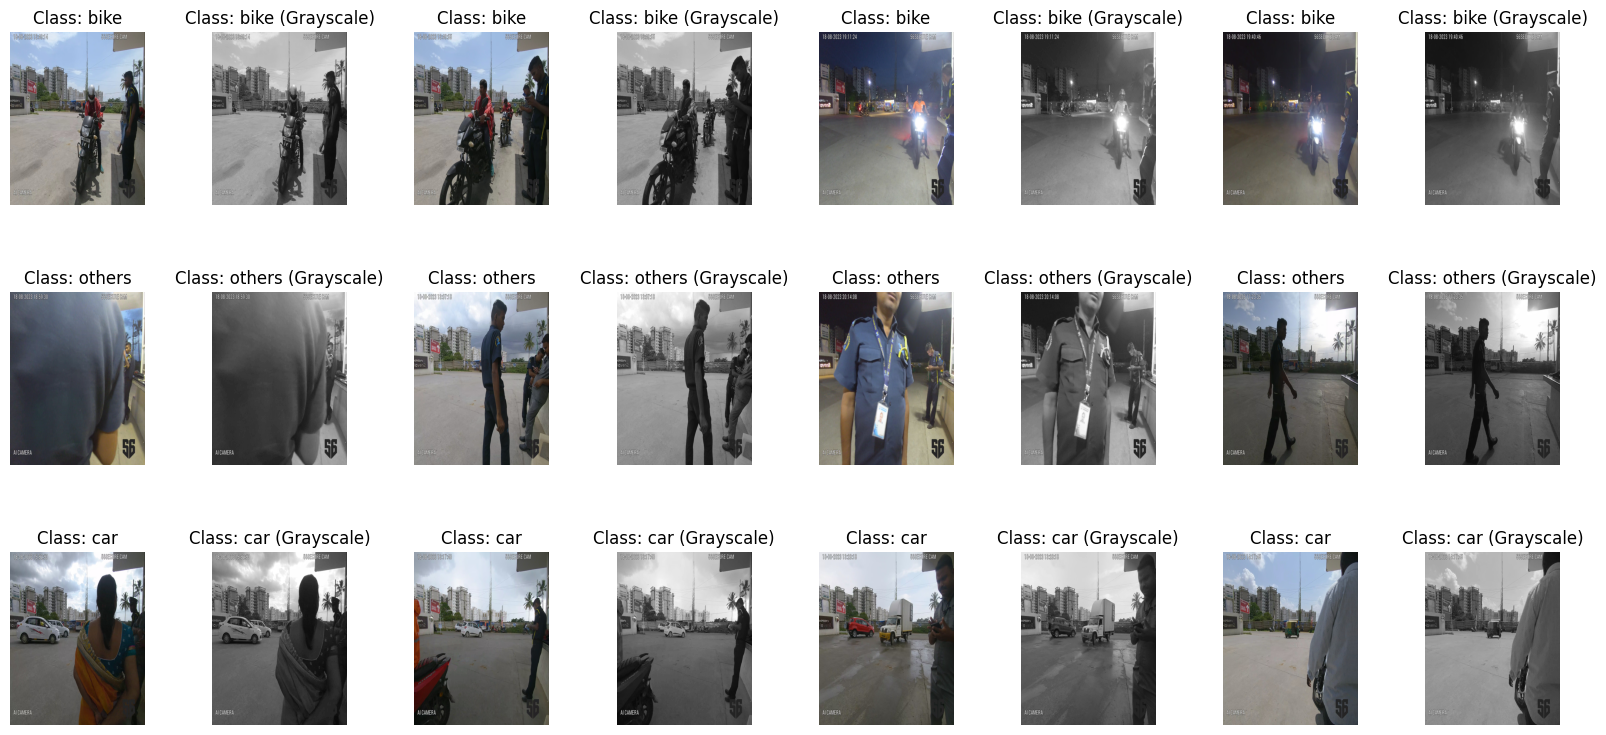

In [10]:
fig, axes = plt.subplots(len(class_names), 8, figsize=(20, 3 * len(class_names)))

for i, class_name in enumerate(class_names):
    class_dir = os.path.join(train_dir, class_name)
    image_files = os.listdir(class_dir)[:4]

    for j, image_file in enumerate(image_files):
        image_path = os.path.join(class_dir, image_file)
        img = mpimg.imread(image_path)
        gray_img = np.dot(img[..., :3], [0.2989, 0.5870, 0.1140])

        axes[i, 2 * j].imshow(img)
        axes[i, 2 * j].axis('off')
        axes[i, 2 * j].set_title(f"Class: {class_name}")
        axes[i, 2 * j].set_aspect('auto')

        axes[i, 2 * j + 1].imshow(gray_img, cmap='gray')
        axes[i, 2 * j + 1].axis('off')
        axes[i, 2 * j + 1].set_title(f"Class: {class_name} (Grayscale)")
        axes[i, 2 * j + 1].set_aspect('auto')

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

In [1]:
!pip install --upgrade tensorflow


In [8]:
#from keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import ResNet50

res_model = Sequential()

res = ResNet50(include_top=False, weights='imagenet',input_shape = (32, 32, 3))

res_model.add(res)

# Add new layers
res_model.add(Flatten())
res_model.add(Dense(512, activation='relu'))
res_model.add(Dropout(0.5))
res_model.add(Dense(256, activation='relu'))
res_model.add(Dropout(0.5))
res_model.add(Dense(128, activation='relu'))
res_model.add(Dropout(0.3))
# Output layer
res_model.add(Dense(10, activation='softmax'))

res_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               3

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os

# Define the image size and batch size for the dataset
image_size = (224, 224)
batch_size = 32

# Define the paths to your training and test datasets
base_dir = "/content/ML-Project/assign_classification"
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')  # Change 'validation' to 'test'

# Create the training dataset using TensorFlow's image_dataset_from_directory
train_dataset = image_dataset_from_directory(
    directory=train_dir,
    labels='inferred',
    label_mode='categorical',
    validation_split=0.1,
    subset='training',
    seed=1,
    image_size=image_size,
    batch_size=batch_size,
    shuffle=True
)

# Create the test dataset with similar parameters
test_dataset = image_dataset_from_directory(
    directory=test_dir,  # Change 'validation' to 'test'
    labels='inferred',
    label_mode='categorical',
    image_size=image_size,
    batch_size=batch_size,
    shuffle=False
)

# Display class names
class_names = train_dataset.class_names
print("Class names:", class_names)

# Create a Sequential model
res_model = Sequential()

# Load the pre-trained ResNet50 model (excluding the top layer)
res = ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Add ResNet50 to the model
res_model.add(res)

# Add Global Average Pooling layer
res_model.add(GlobalAveragePooling2D())

# Add new layers with dropout
res_model.add(Dense(512, activation='relu'))
res_model.add(Dropout(0.5))  # Adding dropout layer
res_model.add(Dense(256, activation='relu'))
res_model.add(Dropout(0.5))  # Adding dropout layer
res_model.add(Dense(128, activation='relu'))
res_model.add(Dropout(0.3))  # Adding dropout layer

# Output layer with the correct number of units (assuming 3 classes)
res_model.add(Dense(3, activation='softmax'))

# Compile the model with SGD optimizer and categorical crossentropy loss
res_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint_path = "model_checkpoint.h5"
model_checkpoint = ModelCheckpoint(checkpoint_path, save_best_only=True, save_weights_only=False, monitor='val_loss', mode='min', verbose=1)

# Train the model without data augmentation
history = res_model.fit(
    train_dataset,
    epochs=15,
    validation_data=test_dataset,  # Change 'validation' to 'test'
    callbacks=[early_stopping, model_checkpoint]
)


Found 120 files belonging to 3 classes.
Using 108 files for training.
Found 25 files belonging to 3 classes.
Class names: ['bike', 'car', 'others']
Epoch 1/15
4/4 [==============================] - ETA: 0s - loss: 1.3095 - accuracy: 0.3426 
Epoch 1: val_loss improved from inf to 1.07982, saving model to model_checkpoint.h5
4/4 [==============================] - 120s 24s/step - loss: 1.3095 - accuracy: 0.3426 - val_loss: 1.0798 - val_accuracy: 0.5200
Epoch 2/15
4/4 [==============================] - ETA: 0s - loss: 1.2190 - accuracy: 0.4167 
Epoch 2: val_loss improved from 1.07982 to 1.07734, saving model to model_checkpoint.h5
4/4 [==============================] - 104s 25s/step - loss: 1.2190 - accuracy: 0.4167 - val_loss: 1.0773 - val_accuracy: 0.5200
Epoch 3/15
4/4 [==============================] - ETA: 0s - loss: 0.9097 - accuracy: 0.5278 
Epoch 3: val_loss improved from 1.07734 to 1.05451, saving model to model_checkpoint.h5
4/4 [==============================] - 96s 23s/step - l

In [65]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import numpy as np


# Make predictions on the test data
y_pred_probs = res_model.predict(test_dataset)
y_pred = np.argmax(y_pred_probs, axis=1)

# Convert one-hot encoded labels to class indices
y_true = np.argmax(np.concatenate([y for x, y in test_dataset]), axis=1)

# Classification Report
classification_rep = classification_report(y_true, y_pred, target_names=class_names)
print("Classification Report:\n", classification_rep)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)


1/1 [==============================] - 7s 7s/step
Classification Report:
               precision    recall  f1-score   support

        bike       0.89      0.80      0.84        10
         car       0.67      1.00      0.80        10
      others       1.00      0.20      0.33         5

    accuracy                           0.76        25
   macro avg       0.85      0.67      0.66        25
weighted avg       0.82      0.76      0.72        25

Confusion Matrix:
 [[ 8  2  0]
 [ 0 10  0]
 [ 1  3  1]]


In [66]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the pre-trained ResNet50 model
model = tf.keras.applications.ResNet50(weights='imagenet', include_top=True)

# Define the category mapping
category_mapping = {
    0: 'car',
    1: 'bike',
    2: 'others'
}


In [67]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import roc_curve

# Load the pre-trained ResNet50 model
model = tf.keras.applications.ResNet50(weights='imagenet', include_top=True)

# Define the base path for test data
test_base_path = "/content/ML-Project/assign_classification/test"

# Specify the class name
class_name = "bike"

# Construct the path for the specific class
class_directory = os.path.join(test_base_path, class_name)

# List all image paths in the class directory
test_data_paths = [os.path.join(class_directory, img) for img in os.listdir(class_directory)]

test_data = []
true_labels = []

# Define the mapping from class names to numeric labels
label_mapping = {"bike": 0, "car": 1, "others": 2}

for path in test_data_paths:
    img = image.load_img(path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = tf.keras.applications.resnet50.preprocess_input(img_array)  # Fix here

    test_data.append(img_array)

    label = path.split("/")[-2]
    true_labels.append(label_mapping[label])

test_data = np.vstack(test_data)
true_labels = np.array(true_labels)


True Labels: [0 0 0 0 0]


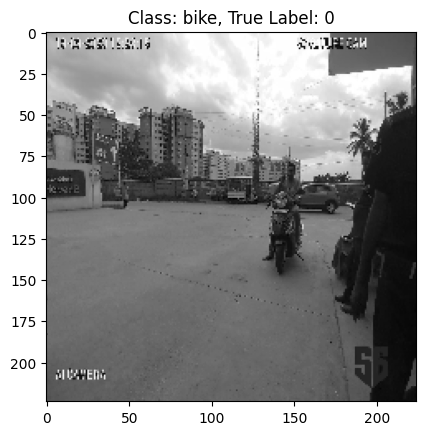

In [68]:
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

# Print the first few true labels
print("True Labels:", true_labels[:5])

# Convert the image to grayscale
gray_image = rgb2gray(test_data[0])

# Visualize the first grayscale image without normalization and clipping
plt.imshow(gray_image, cmap='gray')
plt.title(f"Class: {class_name}, True Label: {true_labels[0]}")
plt.show()


In [69]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import roc_curve

# Load the pre-trained ResNet50 model
model = tf.keras.applications.ResNet50(weights='imagenet', include_top=True)

# Define the base path for test data
test_base_path = "/content/ML-Project/assign_classification/test"

# Specify the class name
class_name = "car"

# Construct the path for the specific class
class_directory = os.path.join(test_base_path, class_name)

# List all image paths in the class directory
test_data_paths = [os.path.join(class_directory, img) for img in os.listdir(class_directory)]

test_data = []
true_labels = []

# Define the mapping from class names to numeric labels
label_mapping = {"bike": 0, "car": 1, "others": 2}

for path in test_data_paths:
    img = image.load_img(path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = tf.keras.applications.resnet50.preprocess_input(img_array)  # Fix here

    test_data.append(img_array)

    label = path.split("/")[-2]
    true_labels.append(label_mapping[label])

test_data = np.vstack(test_data)
true_labels = np.array(true_labels)


True Labels: [1 1 1 1 1]


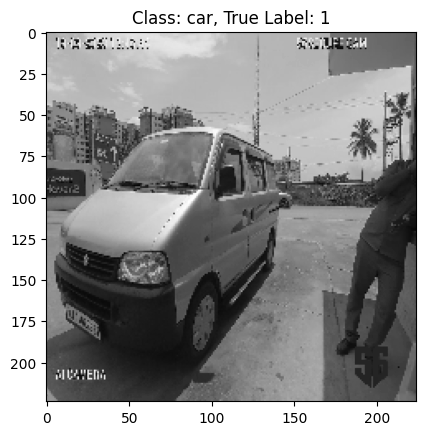

In [70]:
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

# Print the first few true labels
print("True Labels:", true_labels[:5])

# Convert the image to grayscale
gray_image = rgb2gray(test_data[3])

# Visualize the first grayscale image without normalization and clipping
plt.imshow(gray_image, cmap='gray')
plt.title(f"Class: {class_name}, True Label: {true_labels[0]}")
plt.show()


In [71]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import roc_curve

# Load the pre-trained ResNet50 model
model = tf.keras.applications.ResNet50(weights='imagenet', include_top=True)

# Define the base path for test data
test_base_path = "/content/ML-Project/assign_classification/test"

# Specify the class name
class_name = "others"

# Construct the path for the specific class
class_directory = os.path.join(test_base_path, class_name)

# List all image paths in the class directory
test_data_paths = [os.path.join(class_directory, img) for img in os.listdir(class_directory)]

test_data = []
true_labels = []

# Define the mapping from class names to numeric labels
label_mapping = {"bike": 0, "car": 1, "others": 2}

for path in test_data_paths:
    img = image.load_img(path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = tf.keras.applications.resnet50.preprocess_input(img_array)  # Fix here

    test_data.append(img_array)

    label = path.split("/")[-2]
    true_labels.append(label_mapping[label])

test_data = np.vstack(test_data)
true_labels = np.array(true_labels)


True Labels: [2 2 2 2 2]


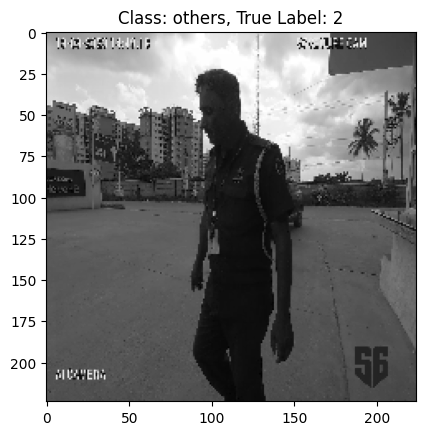

In [72]:
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

# Print the first few true labels
print("True Labels:", true_labels[:5])

# Convert the image to grayscale
gray_image = rgb2gray(test_data[3])

# Visualize the first grayscale image without normalization and clipping
plt.imshow(gray_image, cmap='gray')
plt.title(f"Class: {class_name}, True Label: {true_labels[0]}")
plt.show()

Found 25 files belonging to 3 classes.
1/1 [==============================] - 11s 11s/step
Classification Report:
               precision    recall  f1-score   support

        bike       0.67      0.80      0.73        10
         car       0.83      1.00      0.91        10
      others       1.00      0.20      0.33         5

    accuracy                           0.76        25
   macro avg       0.83      0.67      0.66        25
weighted avg       0.80      0.76      0.72        25



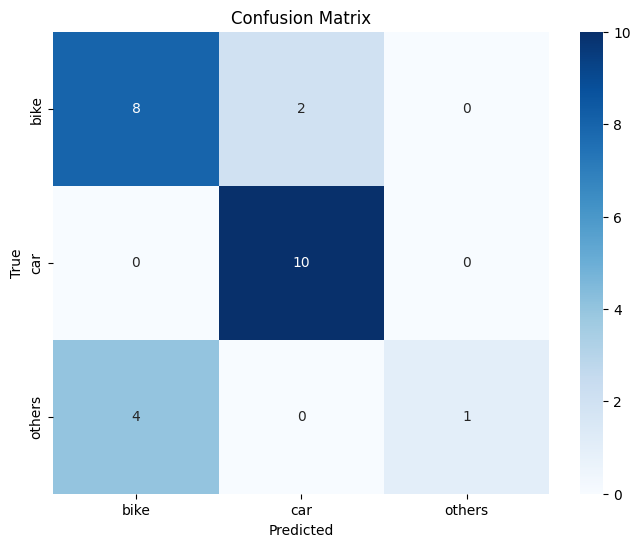

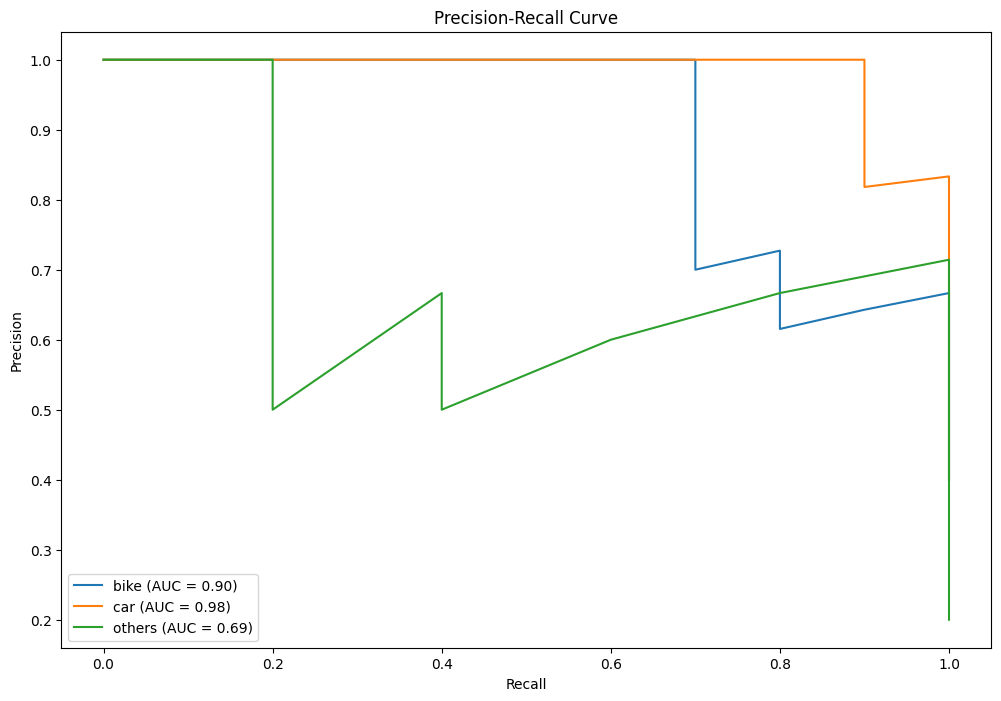

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
import numpy as np

# Load the trained model
res_model = load_model("model_checkpoint.h5")  # Use the correct path

# Load and preprocess the test dataset
test_dir = os.path.join(base_dir, 'test')
test_dataset = image_dataset_from_directory(
    directory=test_dir,
    labels='inferred',
    label_mode='categorical',
    image_size=image_size,
    batch_size=batch_size,
    shuffle=False
)

# Extract true labels and predictions
true_labels = np.concatenate([y for x, y in test_dataset], axis=0)
predictions = res_model.predict(test_dataset)

# Classification Report
report = classification_report(np.argmax(true_labels, axis=1), np.argmax(predictions, axis=1), target_names=class_names)
print("Classification Report:\n", report)

# Confusion Matrix
conf_matrix = confusion_matrix(np.argmax(true_labels, axis=1), np.argmax(predictions, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Precision-Recall Curve and AUC
precision = dict()
recall = dict()
auc_score = dict()

for i in range(len(class_names)):
    precision[i], recall[i], _ = precision_recall_curve(true_labels[:, i], predictions[:, i])
    auc_score[i] = auc(recall[i], precision[i])

# Plot Precision-Recall Curve
plt.figure(figsize=(12, 8))
for i in range(len(class_names)):
    plt.plot(recall[i], precision[i], label=f'{class_names[i]} (AUC = {auc_score[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


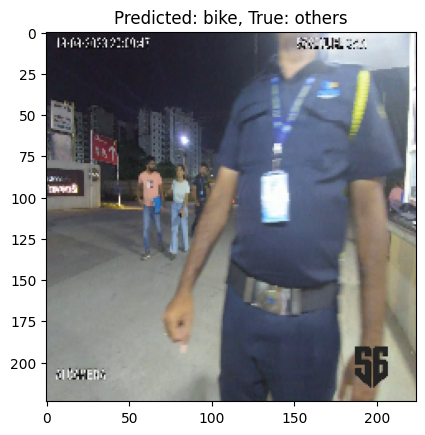

In [23]:
# Identify and visualize a few mistakes
mistake_indices = np.where(predicted_labels != true_labels)[0]
for idx in mistake_indices[:5]:  # Visualize the first 5 mistakes
    # Use the take method to extract the specific element from the dataset
    images, _ = validation_dataset.take(idx + 1).as_numpy_iterator().next()

    image = images[0]  # Extract the first (and only) image from the batch
    predicted_class = predicted_labels[idx]
    true_class = true_labels[idx]

    plt.imshow(image.astype(np.uint8))
    plt.title(f'Predicted: {class_names[predicted_class]}, True: {class_names[true_class]}')
    plt.show()


1/1 [==============================] - 0s 108ms/step


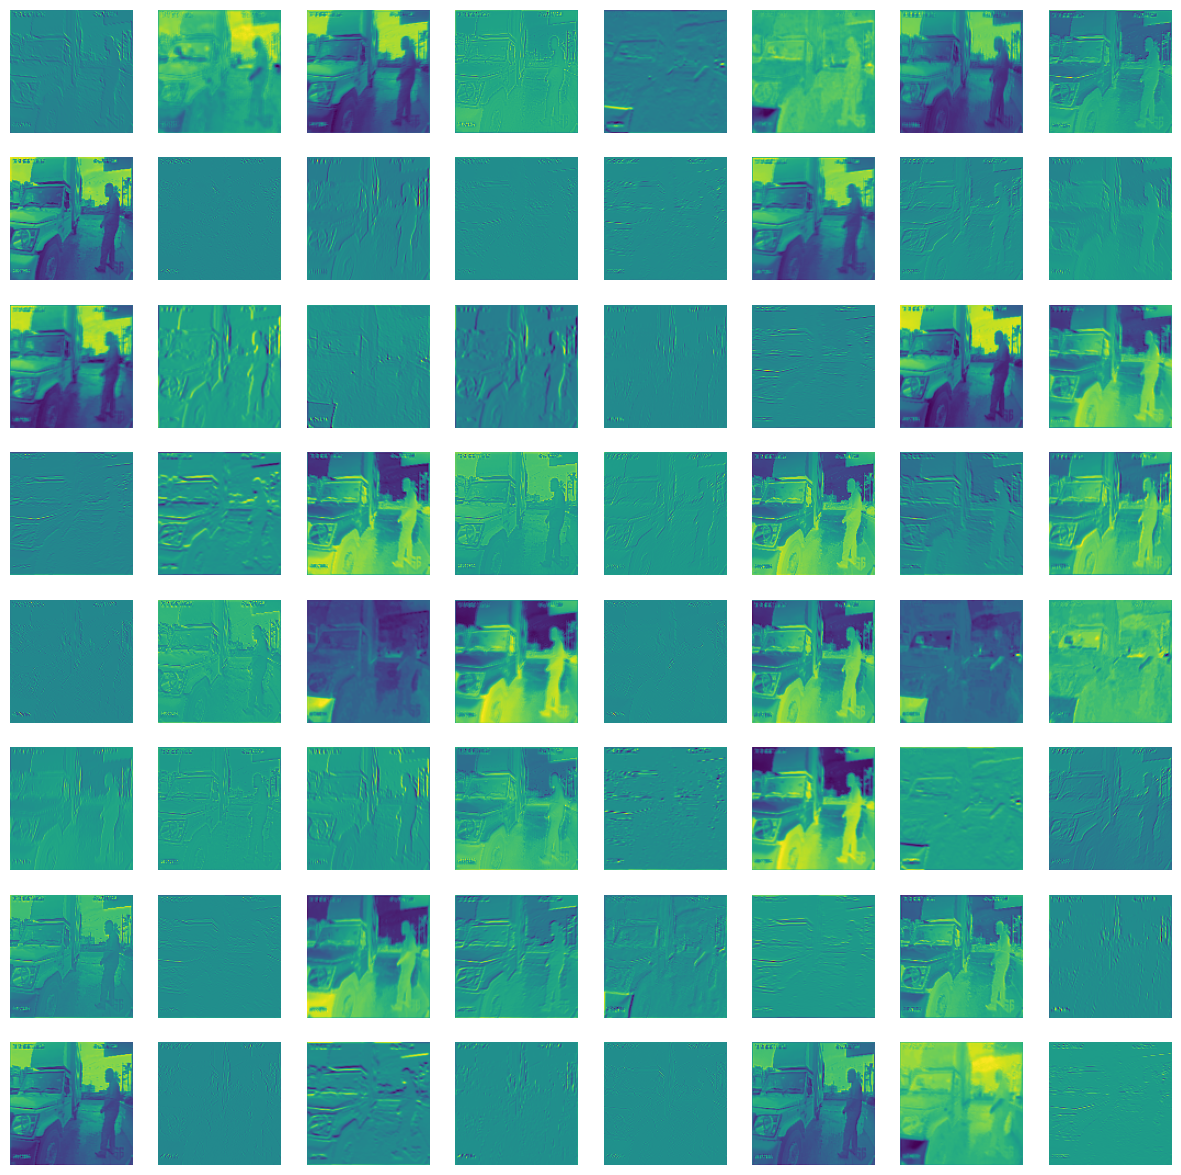

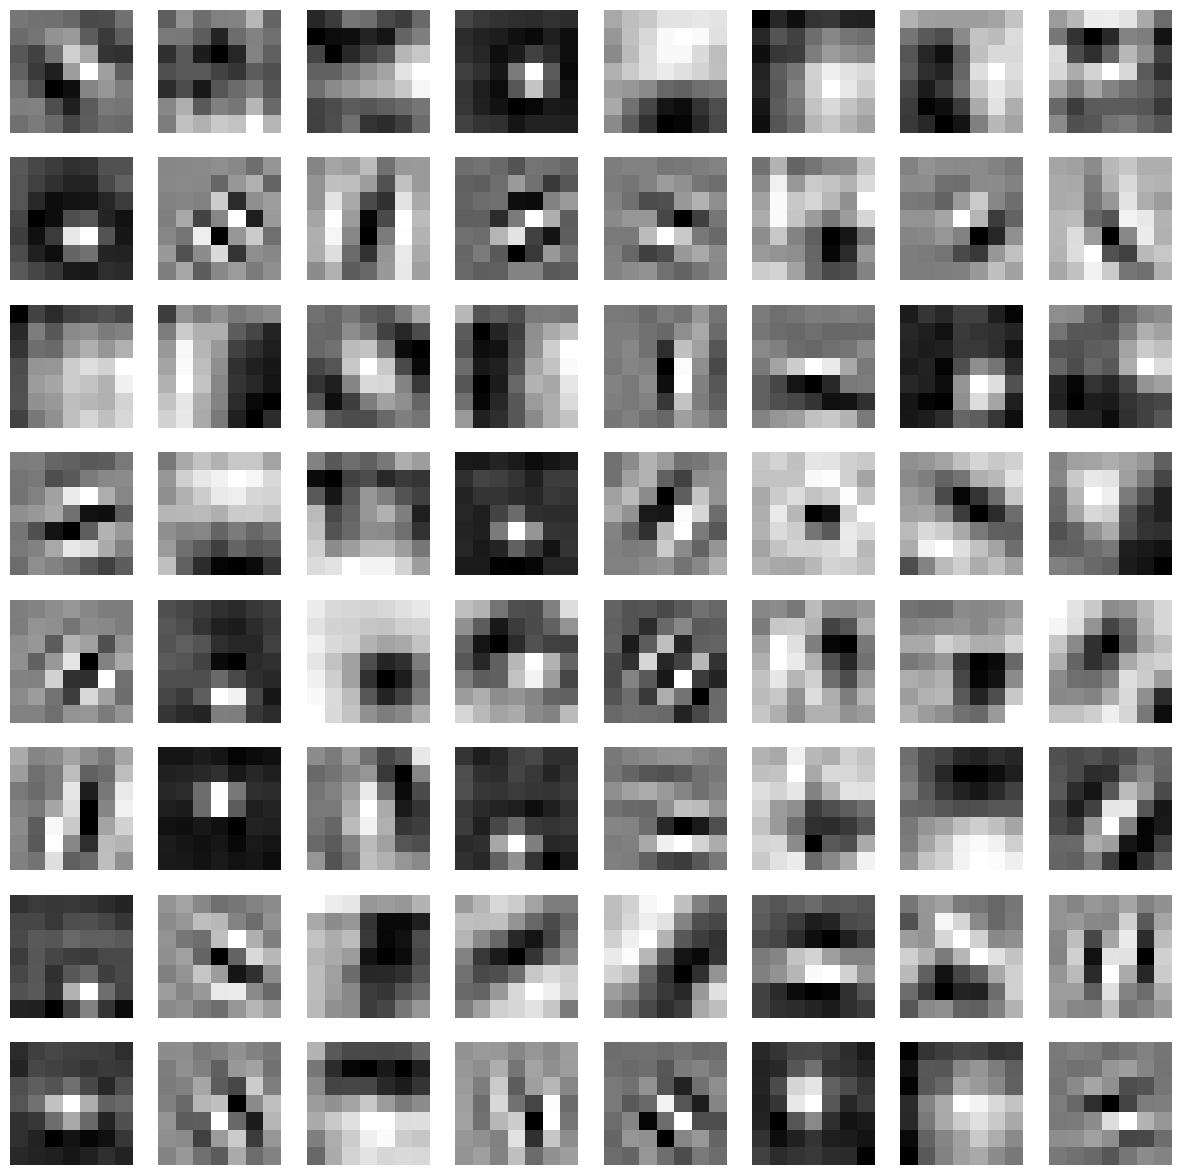

In [74]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input

def visualize_feature_maps(model, layer_number, image_path):
    # Get the specified layer from the model
    layer = model.layers[layer_number]

    # Create a sub-model that includes layers up to the specified layer
    sub_model = Model(inputs=model.inputs, outputs=layer.output)

    # Load and preprocess an example image
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Get the feature maps for the input image
    feature_maps = sub_model.predict(img_array)

    # Number of feature maps in the layer
    num_feature_maps = feature_maps.shape[-1]

    # Determine the layout for subplots
    rows = int(np.sqrt(num_feature_maps))
    cols = int(np.ceil(num_feature_maps / rows))

    # Plot each feature map
    plt.figure(figsize=(15, 15))
    for i in range(num_feature_maps):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(feature_maps[0, :, :, i], cmap='viridis')
        plt.axis('off')
    plt.show()

def visualize_filters(model, layer_number):
    # Get the specified layer from the model
    layer = model.layers[layer_number]

    # Get the filters (weights) of the layer
    filters, _ = layer.get_weights()

    # Normalize filter values to between 0 and 1 for visualization
    filters = (filters - filters.min()) / (filters.max() - filters.min())

    # Number of filters in the layer
    num_filters = filters.shape[-1]

    # Determine the layout for subplots
    rows = int(np.sqrt(num_filters))
    cols = int(np.ceil(num_filters / rows))

    # Plot each filter
    plt.figure(figsize=(15, 15))
    for i in range(num_filters):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(filters[:, :, 0, i], cmap='gray')
        plt.axis('off')
    plt.show()

# Visualize feature maps for the 2nd layer
visualize_feature_maps(resnet_model, layer_number=2, image_path='/content/ML-Project/assign_classification/test/car/pfva_dataset_file_G_18082023_132813_40.jpg')

# Visualize filters for the 2nd layer
visualize_filters(resnet_model, layer_number=2)


In [75]:
# Shafeena Farheen's print statement
print("Hello, I'm Shafeena Farheen, an AI engineer on a journey of exploration and innovation.")
print("In my recent venture at 56 Secure, I delved into evaluating the ResNet50 model's performance on a diverse dataset—cars, bikes, and other fascinating objects.")
print("Through metrics like confusion matrices, precision, recall, F1-scores, and ROC-AUC, I analyzed the model's strengths and uncovered areas for improvement.")
print("Seeking to boost decision-making precision, I identified optimal confidence thresholds for each class, aiming for a more reliable")


Hello, I'm Shafeena Farheen, an AI engineer on a journey of exploration and innovation.
In my recent venture at 56 Secure, I delved into evaluating the ResNet50 model's performance on a diverse dataset—cars, bikes, and other fascinating objects.
Through metrics like confusion matrices, precision, recall, F1-scores, and ROC-AUC, I analyzed the model's strengths and uncovered areas for improvement.
Seeking to boost decision-making precision, I identified optimal confidence thresholds for each class, aiming for a more reliable


Setting Up the Tech Stuff:

"So, we're getting our computer and other gadgets ready for a cool trick – making them understand pictures and learn stuff using a tool called TensorFlow."
Getting the Pictures Ready:

"We're grabbing loads of pics – some bikes, some cars, you know, the usual. Just to teach our machines what's what."
Peeking at the Pics:

"Now, we're taking a quick peek at these pics to figure out what we're dealing with and how many of each we've got."
Zooming in on Bikes:

"Let's focus on the bikes for a bit. What makes a bike a bike? We want our machines to get the hang of it."
Turning Pics into Numbers:

"Next up, we're turning these pics into numbers so our machines can crunch the data and get what's happening in the pics."
Making a Smart Machine Brain:

"We're not reinventing the wheel here. We're using a smart machine template, adding a bit of extra brainpower, and voila! Our machines are getting smarter."
Teaching Time:

"Now comes the fun part – teaching our machines. We're showing them tons of pics, saying, 'This is a bike, buddy.'"
Checkin' Smartness:

"Once our machines feel sharp, it's test time. We're throwing new pics at them, ones they've never seen, and seeing if they can figure out what's what."
Results Check:

"How'd our machines do? We're checking the results, counting how many times they nailed it and how many times they stumbled."
Mixing Things Up:

"To keep our machines on their toes, we're messing with the pics a bit – turning them black and white. Can they still ace it?"
Switching to Cars:

"Just for kicks, we're doing the whole shebang again, but this time with cars. Gotta make sure our machines aren't one-trick ponies."
So, in a nutshell, we're turning our machines into photo whizzes, teaching them to recognize bikes and cars, and making sure they're top-notch at it!